In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numba import jit  # makes things faster
import sys  # add spocc directory to path
import os
module_path = os.path.abspath(os.path.join('/home/jupyter/SPOcc/spocc/'))
if module_path not in sys.path:
    sys.path.append(module_path)
import loaders
module_path = os.path.abspath(os.path.join('/home/jupyter/EightBitTransitGPU/EightBitTransit/'))
if module_path not in sys.path:
    sys.path.append(module_path)
from eightbitref import transit_model


Disk mounted at /mnt/disks/lcs/tess-goddard-lcs/
Bucket mounted at /home/jupyter/mountpoint/

    NvvmSupportError: libNVVM cannot be found. Do `conda install cudatoolkit`:
    libnvvm.so: cannot open shared object file: No such file or directory

    Initializing EightBitTransit *without* gpu multiprocessing.
    


# Generate reference signal

In [69]:
model = transit_model(
    imfile="./ShadowImagingTitle.png",
    lowres=20,
    lowrestype="mean",
    lowresround=False,
)
#model_LC = model.gen_ref_LC() # also accessible by model.ref_LC once run

In [56]:
signal_flux, signal_time = model.gen_LC(t_arr=model.t_arr)

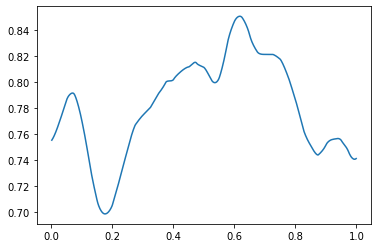

In [58]:
plt.plot(signal_time, signal_flux)

In [29]:
model.opacitymat.shape

(20, 166)

In [41]:
"""
Want to move 1 pixel per time unit. Need to find dt
Want image centered at t_ref = 0
t0 = -1, tf = 1. Total time = 2 days
model.opacitymat.shape[1] / 2 days = npixels/days = v
v = model.opacitymat.shape[1] / 2 days * 1*rstar/(model.opacitymat.shape[0]/2)
"""
rstar_pix = model.opacitymat.shape[0]/2 # = 1*rstar = rpixels
t_ref = 0.0 # = "day"
t0 = -0.999
t1 = 0.999
v = (model.opacitymat.shape[1]/rstar_pix)/(t1-t0)

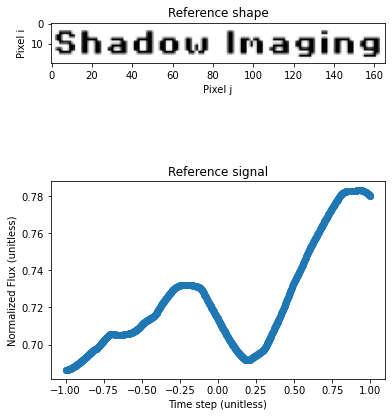

In [39]:
fig, ax = plt.subplots(2, figsize=(6,8), gridspec_kw={"height_ratios":[1,1]})
ax[0].imshow(model.opacitymat, cmap="Greys")
ax[0].set_title("Reference shape");
ax[0].set_xlabel("Pixel j");
ax[0].set_ylabel("Pixel i");

ax[1].scatter(model_times, model_LC)
ax[1].set_title("Reference signal");
ax[1].set_xlabel("Time step (unitless)");
ax[1].set_ylabel("Normalized Flux (unitless)");


# Import some random light curves

In [7]:
ref = loaders.load_ref(18, "/home/jupyter/mountpoint/")
random_ref = ref.sample(5, random_state=1)
scores = pd.read_hdf("/home/jupyter/mountpoint/dataproducts/db.v2.h5", "S18/scores")
scores['rank'] = scores.rank(ascending=False)
scores[scores.index.isin(random_ref.TIC_ID)] # check that random lcs are low ranking

,scores,rank
TIC_ID,,
230021516,0.000462,1552193.0
426153813,0.000674,273276.0
320608469,0.000508,1077884.0
117117120,0.000592,517598.0
374569101,0.000363,2649185.0


In [8]:
lcc_random = loaders.LightCurveCollection(random_ref)

## Example 1 

In [9]:
lc = lcc_random[0]

In [10]:
signal = model.signal_fit(lc.time.value, 1.1, 0.2, lc.time.value[600])

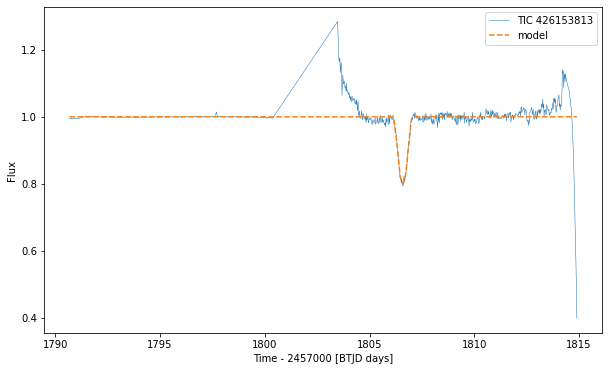

In [11]:
fig, ax = plt.subplots(1, figsize=(10,6))
(lc+signal-1).plot(ax=ax)
ax.plot(lc.time.value, signal, linestyle="--", label="model")
plt.legend()

## Example 2

In [12]:
lc = lcc_random[1]

In [13]:
signal = model.signal_fit(lc.time.value, 3., 0.8, lc.time.value[200])

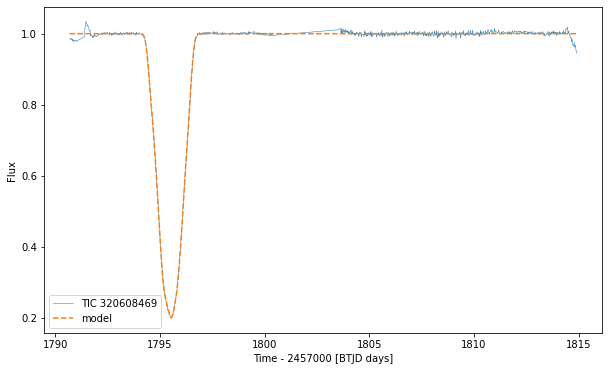

In [14]:
fig, ax = plt.subplots(1, figsize=(10,6))
(lc+signal-1).plot(ax=ax)
ax.plot(lc.time.value, signal, linestyle="--", label="model")
plt.legend()

## Try it yourself

In [ ]:
lc = lcc_random[2]

In [ ]:
width = 
depth = 
tref = 
signal = model.signal_fit(lc.time.value, width, depth, tref)

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,6))
(lc+signal-1).plot(ax=ax)
ax.plot(lc.time.value, signal, linestyle="--", label="model")
plt.legend()